In [1]:
# Load core libraries and utilities
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Jupyter notebook "magic"
%matplotlib inline

In [2]:
# Find, load, and convert image from textbook data
textbook_image_files_path = '/Textbook Code and Data/DATA_PYTHON/DATA/'
dog_grayscale = io.imread('..' + textbook_image_files_path + 'dog.jpg', as_gray=True)
print(type(dog_grayscale))

<class 'numpy.ndarray'>


In [3]:
# We need a tool that converts images into grayscale (i.e. all pixel values in [0, 1])
def gray_scale_convert(image):
    rescaled_image = np.zeros((image.shape[0], image.shape[1]))
    rescaled_image[:, :] = image
    rescaled_image -= np.min(rescaled_image)
    rescaled_image /= np.max(rescaled_image)
    return rescaled_image

In [4]:
# We would like to easily comapre different images to one another after we do various things to them.  
def image_comparison(original_image, reduced_image):
    gscale_reduced_image = gray_scale_convert(reduced_image) # note, we need to make sure skinny_puppy is grayscale
    difference = np.abs( original_image - gscale_reduced_image )

    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    ax = axes.ravel()
    ax[0].imshow(original_image, cmap=plt.cm.gray)
    ax[0].set_title("Original")
    ax[1].imshow(gscale_reduced_image, cmap=plt.cm.gray) 
    ax[1].set_title("Reduced")
    ax[2].imshow(difference, cmap=plt.cm.gray)
    ax[2].set_title("Difference")
    fig.tight_layout()

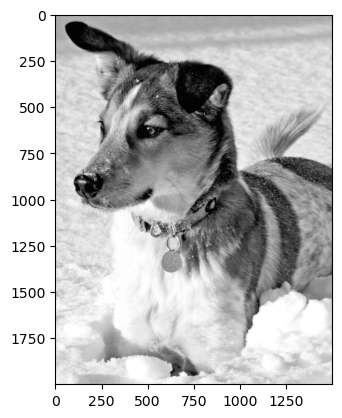

In [5]:
# PUPPY TIME!
plt.imshow(dog_grayscale, cmap=plt.cm.gray)

In [6]:
# Compute the SVD of the grayscale dog image
u, s, vh = np.linalg.svd(dog_grayscale, full_matrices=False)

Text(0, 0.5, '$\\log_{10}(s/s_{0})$')

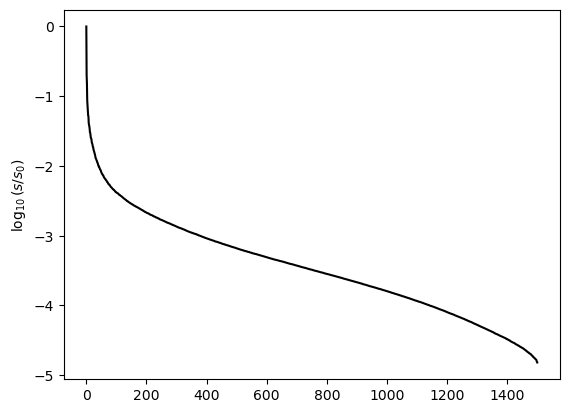

In [7]:
# Analyze singular values
smax = s[0]
s_log_scaled = np.ma.log10(s/smax)
plt.plot(s_log_scaled, color='k')
plt.ylabel(r"$\log_{10}(s/s_{0})$")

So looking at our rescaled singular values, we see that there is a precipitous drop off in magnitude after about the first 100 terms.  What if we only used these singular values and their affiliated vectors?  Doing this sort of thing in Python is really slick.  Watch...

In [8]:
indskp = np.log10(s/smax) >= -2 # We only keep singular values that are 1/100 the magnitude of the largest.  
skinny_puppy = u[:,indskp] @ np.diag( s[indskp] ) @ vh[indskp, :]

If we look at the ratio of how many singular values we kept to how many we started with, we get a sense of the percentage of information we keep when we reduce data this way.  To wit...

In [9]:
compression_ratio = s[indskp].size/s.size
print("The compression ratio is {0:1.2f}%".format(compression_ratio*100.))

The compression ratio is 2.73%


So by truncating those singular values which are 1/100 the size of the largest, we only keep 2.73% of our original singular values.  Let's see what that gets us.

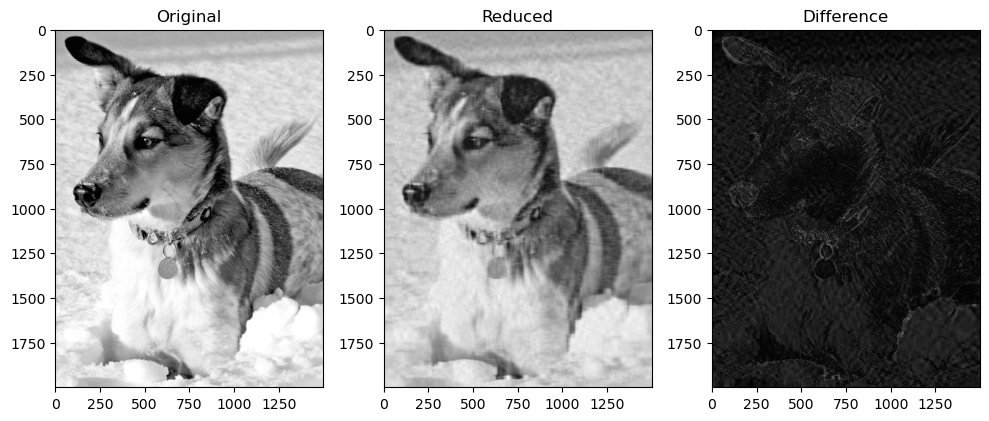

In [10]:
# How much puppy do we have left? Let's plot the original and reduced figures as well as the difference side-by-side
image_comparison(dog_grayscale, skinny_puppy)

So we certainly can see some differences between the original and reduced images, but the difference is an issue of crispness.  The reduced image is still clearly our original puppy.  Now let's see what happens if we push this argument a little too far. 

In [11]:
indskp = np.log10(s/smax) >= -1 # We only keep singular values that are 1/10 the magnitude of the largest.  
really_skinny_puppy = u[:,indskp] @ np.diag( s[indskp] ) @ vh[indskp, :]
compression_ratio = s[indskp].size/s.size
print("The compression ratio is {0:1.2f}%".format(compression_ratio*100.))

The compression ratio is 0.20%


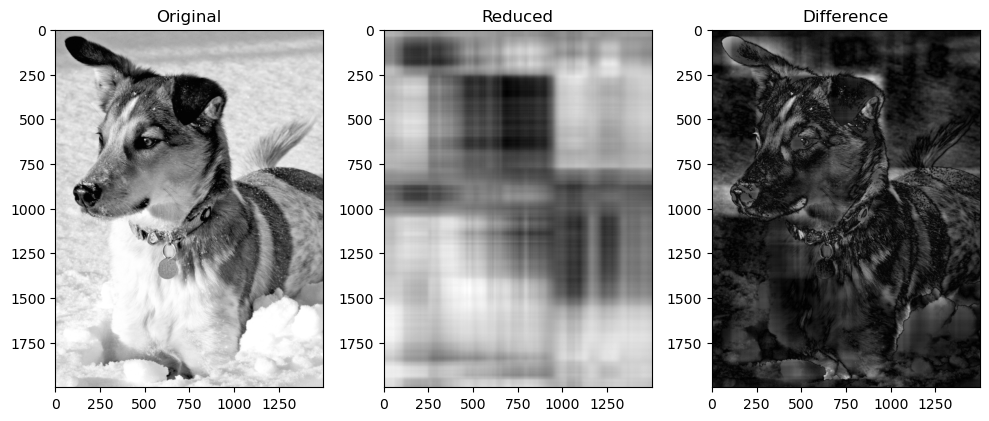

In [12]:
image_comparison(dog_grayscale, really_skinny_puppy)

Okay, by only taking .2% of our original image, our reduction really does make the dog disappear.  